In [1]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(2382)
colormap = {0:'black', 1:'red', 2:'blue'}

2023-11-07 10:04:25.470687: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-07 10:04:25.476105: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 10:04:25.549288: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 10:04:25.549337: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 10:04:25.549369: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

# 0. Load the data

In [2]:
data_raw = load_iris(as_frame=True)
species_names = data_raw['target_names']
data = data_raw['frame']
data = data.drop(columns=['sepal length (cm)','sepal width (cm)'])
data = data.rename(columns={'petal length (cm)':'petal_length','petal width (cm)':'petal_width','target':'species'})

X = data[['petal_length','petal_width']].to_numpy()
y = data['species'].to_numpy().reshape(-1, 1)

data['species'] = data['species'].map({0:'setosa',1:'versicolor',2:'virginica'})
data

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


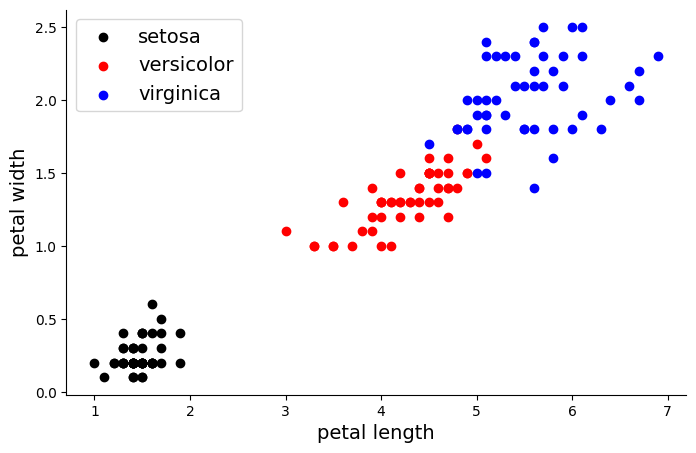

In [3]:
fig, ax = plt.subplots(figsize=(8,5))
for yy in range(3):
    ind = y==yy
    ax.scatter(data.loc[ind,'petal_length'],data.loc[ind,'petal_width'],label=species_names[yy],c=colormap[yy])
ax.legend(fontsize=14)
ax.set_xlabel('petal length',fontsize=14)
ax.set_ylabel('petal width',fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 1. Output encoding

In [4]:
y_ohe = tf.keras.utils.to_categorical(y)

# 2. Neural network model

In [5]:
model = Sequential([
    Dense(40, input_dim=2, activation='relu'),
    Dense(40, input_dim=2, activation='relu'),
    Dense(3, activation="softmax") ])

model.compile(loss="categorical_crossentropy", 
              metrics=["accuracy"])

# 3. Train the model

In [6]:
history = model.fit(X, y_ohe, 
                    epochs=500)

Epoch 1/500
5/5 [==============================] - 1s 5ms/step - loss: 1.0481 - accuracy: 0.3733
Epoch 2/500
5/5 [==============================] - 0s 4ms/step - loss: 0.9904 - accuracy: 0.3333
Epoch 3/500
5/5 [==============================] - 0s 4ms/step - loss: 0.9767 - accuracy: 0.3333
Epoch 4/500
5/5 [==============================] - 0s 4ms/step - loss: 0.9577 - accuracy: 0.3333
Epoch 5/500
5/5 [==============================] - 0s 4ms/step - loss: 0.9448 - accuracy: 0.3333
Epoch 6/500
5/5 [==============================] - 0s 4ms/step - loss: 0.9303 - accuracy: 0.3333
Epoch 7/500
5/5 [==============================] - 0s 4ms/step - loss: 0.9146 - accuracy: 0.3467
Epoch 8/500
5/5 [==============================] - 0s 4ms/step - loss: 0.9017 - accuracy: 0.4333
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: 0.8884 - accuracy: 0.5467
Epoch 10/500
5/5 [==============================] - 0s 4ms/step - loss: 0.8713 - accuracy: 0.6067
Epoch 11/500
5/5 [===========

### Evolution of the model during training

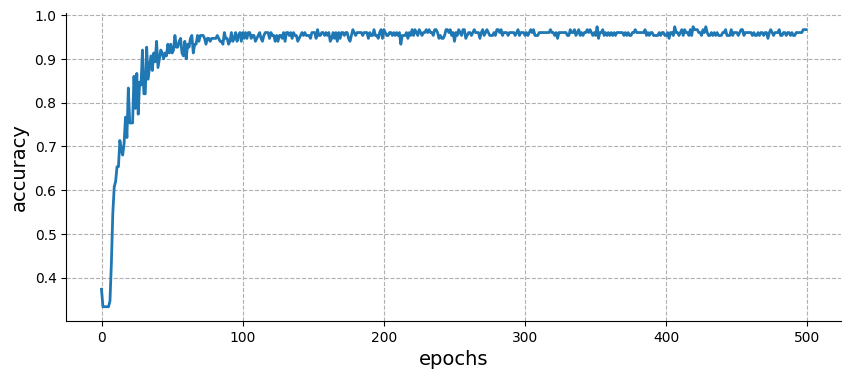

In [7]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(history.history['accuracy'], linewidth=2)
ax.grid(linestyle='--')
ax.set_xlabel('epochs',fontsize=14)
ax.set_ylabel('accuracy',fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### Plot decistion boundaries

In [8]:
d1_grid, d2_grid = np.meshgrid(np.arange(xlim[0], xlim[1], 0.02), np.arange(ylim[0], ylim[1], 0.02))
X0 = d1_grid.ravel()
X1 = d2_grid.ravel()

d12_array = np.empty((len(X0),2))
d12_array[:,0] = X0
d12_array[:,1] = X1
i=2

y_array = model.predict(d12_array)
y_grid = y_array.argmax(axis=1).reshape(d1_grid.shape)


1341/1341 [==============================] - 4s 3ms/step


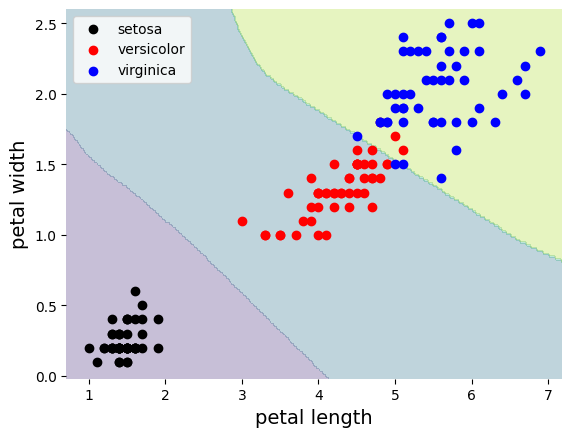

In [9]:

fig, ax = plt.subplots()
plt.contourf(d1_grid, d2_grid, y_grid,alpha=0.3,levels=3)
for yy in range(3):
    ind = y==yy
    ax.scatter(data.loc[ind,'petal_length'],data.loc[ind,'petal_width'],label=species_names[yy],c=colormap[yy])
ax.legend()
ax.set_xlabel('petal length',fontsize=14)
ax.set_ylabel('petal width',fontsize=14)
ax.spines[:].set_visible(False)